<function matplotlib.pyplot.show(close=None, block=None)>

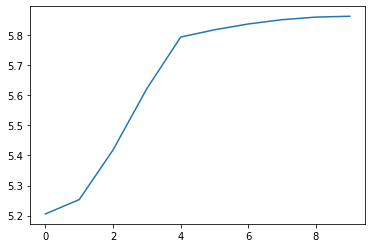

In [3]:
from matplotlib import pyplot as plt
import re
import glob
import numpy as np

position, energy = [], []

data = glob.glob('*.out')

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

for f in data:
    position.append(float(f.strip('.out')))
    energy.append(getEnergy(f))

energies = np.array(energy)
positions = np.array(position)
idx   = np.argsort(positions)

energies = np.array(energies)[idx]
positions = np.array(positions)[idx]

plt.plot(positions, energies)
plt.ylim()
plt.show